## Machine Learning - Doog Breeds - Parte2

Autor: Autor: Eden de Oliveira Santana , Glayson de Melo, Anderson Marques

In [1]:
#Bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import scipy.stats as stats
import statsmodels.api as sm
import random
import math
import sklearn
import os
from io import StringIO

#Biblioteca plotly
import plotly.graph_objects as go
import plotly.express as px


import warnings
warnings.filterwarnings("ignore")

np.set_printoptions(threshold=None, precision=2)
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)
pd.set_option('precision', 2)


#Bibliotecas complementares
from sklearn.metrics import(auc, confusion_matrix, roc_auc_score, roc_curve, precision_score, 
                            accuracy_score, recall_score, f1_score ,classification_report)

from sklearn.model_selection import (train_test_split, StratifiedKFold)
from yellowbrick.classifier import(ConfusionMatrix, ROCAUC)
from yellowbrick.model_selection import (LearningCurve)


from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

<h4> 1. Modelagem dos dados </h4>

Após o enriquecimento dos dados vamos começar a realizar a modelagem dos dados para realizar as predições.

Nossa base de dados possui vários atributos que medem o score de 1 a 5. Quanto mais forte a característica do cão mais alta ele possui aquela característica. Para realizar a modelagem vamos realizar uma transformação nos dados.

O score de 1 a 5 possui média igual 3. Sendo assim para características que possuem baixo score assumirá o valor de **0**, já para escores mais altos assumirá o valor de **1**.

Portanto, 
$$ score < 3 \implies 0 $$
$$ score >= 3 \implies 1 $$

Nossa variável target será prever em que grupo está classificado o cão. Abaixo segue as descrições dos grupos.


- **Companion Dogs** : Cães excelentes para companhias.
- **Herding Dogs**: Os cães desta categoria foram desenvolvidos para controlar grandes rebanhos de ovelhas ou rebanhos de gado.
- **Hound Dogs**: Cães de caça.
- **Hybrid Dogs**:  Raças criadas pelo cruzamento de várias outras raças.
- **Mixed Breed Dogs**: Cães de raça Mista
- **Sporting Dogs**: Cães esportivos.
- **Terrier Dogs**: TApesar de terem propensão a serem aventureiros essa classe tem característica domésticas.
- **Working Dogs**: Os diversos cães representados neste grupo foram criados para executar uma variedade de tarefas, desde guardar pessoas, propriedades e gado até puxar carroças ou trenós.


Dicionário de Dados


- **raca**: raça do cachorro
- **adaptabilidade**:Nível de adaptação do cão
- **simpatia**:	Nível de simpatia do cão
- **necessidade_saude_higiene**: Necessidade de saúde e higiene do cão
- **treinabilidade**:	Facilidade em que o cão pode ser treinado
- **necessidade_fisicas**:	Nível de necssidades do cão
- **vida_apartameto**:	Capacidade em se adaptar a moradia de apartamento
- **bom_proprietarios_iniciantes**:	Cães que se adaptam facilmente aos primeiros moradores.
- **nivel_sensibilidade**:	Nível de sendibilidade do cão
- **tolera_estar_sozinho**:	Capacidade do cão ficar sozinho ou não
- **tolera_tempo_frio**:	Nível de tolerância do cão ao tempo frio
- **tolera_tempo_quente**:	Nível de tolerância do cão ao tempo quente
- **nivel_carinho_familia**:	Nível de carinho com a família
- **adequado_para_criancas**:	Nível de adequação para as crianças
- **cao_amigavel**:	Nível de o quanto o cão é amigável
- **amigavel_com_estranho**:	Nível de o quanto é amigável com desconhecidos
- **queda_pelo**:	Nível de queda de pêlo
- **potencial_babar**:	Se o cão saliva muito ou pouco.
- **facilidade_cuidado**:	Nível de facilidade de cuidar do cão
- **saude_geral**:	Nível de saúde
- **ganho_peso**:	Ganho de peso do cão
- **tamanho**:	Tamanho do cão
- **facil_treinar**:	Nível de facilidade em treinar o cão
- **inteligencia**:	Nível de inteligência
- **nivel_mordida**:	Nível de mordida
- **preso**:	Potencial de ficar preso
- **tendencia_latir_uivar**:	Tendência para latir ou uivar
- **desejo_viajar**:	Nível de distração do cão, isto é, o quanto ele consegue se deslocar ao ser distraído com algo que chame a atenção
- **nivel_energia**:	Nível de energia
- **intensidade**:	Nível de intensidade
- **necessidade_exercicio**:	Necessidade de exercício do cão
- **potencia_diversao**:	Potencial de diversão
- **grupo_raca_cao**:	Grupo de raça que o cão pertence
- **altura**:	Altura medida em polegadas
- **peso**:	Peso medido em libras
- **expectativa_vida**:	Expectativa de vida do cão


Fontes: https://dogtime.com/dog-breeds/profiles/ , https://www.akc.org/dog-breeds, https://wagwalking.com/breed/

In [2]:
#Importando a base de dados

df_doog_breeds = pd.read_excel('D:/ML/Dog Breeds/dog_breeds_dataset_dogtime.xlsx', 'dataset')

In [3]:
df_doog_breeds.head()

,raca,adaptabilidade,simpatia,necessidade_saude_higiene,treinabilidade,necessidade_fisicas,vida_apartamento,bom_proprietarios_iniciantes,nivel_sensibilidade,tolera_estar_sozinho,tolera_tempo_frio,tolera_tempo_quente,nivel_carinho_familia,adequado_para_criancas,cao_amigavel,amigavel_com_estranho,queda_pelo,potencial_babar,facilidade_cuidado,saude_geral,ganho_peso,tamanho,facil_treinar,inteligencia,nivel_mordida,preso,tendencia_latir_uivar,desejo_viajar,nivel_energia,intensidade,necessidade_exercicio,potencia_diversao,grupo_raca_cao,altura,peso,expectativa_vida
0,Afador,2,3,3,4,4,1,1,3,3,4,2,4,2,3,1,4,3,2,3,4,4,1,5,4,4,4,4,4,4,4,3,Mixed Breed Dogs,20 to 29 inches,50 to 75 pounds,10 to 12 years
1,Affenhuahua,3,3,3,3,3,4,4,4,1,2,3,4,3,2,2,2,1,4,4,5,1,3,3,4,2,4,2,4,3,3,3,Mixed Breed Dogs,6 to 12 inches,4 to 12 pounds,13 to 18 years
2,Affenpinscher,3,3,2,3,4,5,4,3,1,3,3,5,1,4,3,1,1,3,4,3,1,2,4,4,3,2,2,4,3,3,4,Companion Dogs,9 to 11 inches,7 to 9 pounds,12 to 14 years
3,Afghan Hound,4,4,2,3,4,5,3,5,2,5,5,5,5,4,2,4,1,1,3,1,4,1,4,3,5,2,5,5,2,4,4,Hound Dogs,24 to 26 inches,50 to 60 pounds,10 to 12 years
4,Airedale Terrier,2,4,3,5,5,1,2,3,2,3,3,4,4,4,3,2,1,2,3,4,3,4,5,5,5,4,4,5,3,5,5,Terrier Dogs,21 to 23 inches,40 to 65 pounds,10 to 13 years


<h4> 1.1. Transformações de Dados </h4>

Antes de aplicar as transforções nos dados vamos realizar uma cópias da base de dados como boas práticas.

Vamos aplicar algumas transformações nas variáveis **altura**, **peso** e **expectativa de vida** aplicando a média dos intervalos.

In [4]:
dataset_dog_breeds = df_doog_breeds.copy()

In [5]:
dataset_dog_breeds['altura'] = dataset_dog_breeds['altura'].str.replace('inches','').str.strip()#.str.replace(' ','').str.replace(' ','')
dataset_dog_breeds['peso'] = dataset_dog_breeds['peso'].str.replace('pounds','').str.strip() #.str.replace(' ','')
dataset_dog_breeds['expectativa_vida'] = dataset_dog_breeds['expectativa_vida'].str.replace('years','').str.strip() #.str.replace(' ','')

#Separando as colunas da altura
dataset_dog_breeds[['First','Last']] = dataset_dog_breeds.altura.str.split("to",expand=True)
dataset_dog_breeds.head()

,raca,adaptabilidade,simpatia,necessidade_saude_higiene,treinabilidade,necessidade_fisicas,vida_apartamento,bom_proprietarios_iniciantes,nivel_sensibilidade,tolera_estar_sozinho,tolera_tempo_frio,tolera_tempo_quente,nivel_carinho_familia,adequado_para_criancas,cao_amigavel,amigavel_com_estranho,queda_pelo,potencial_babar,facilidade_cuidado,saude_geral,ganho_peso,tamanho,facil_treinar,inteligencia,nivel_mordida,preso,tendencia_latir_uivar,desejo_viajar,nivel_energia,intensidade,necessidade_exercicio,potencia_diversao,grupo_raca_cao,altura,peso,expectativa_vida,First,Last
0,Afador,2,3,3,4,4,1,1,3,3,4,2,4,2,3,1,4,3,2,3,4,4,1,5,4,4,4,4,4,4,4,3,Mixed Breed Dogs,20 to 29,50 to 75,10 to 12,20,29
1,Affenhuahua,3,3,3,3,3,4,4,4,1,2,3,4,3,2,2,2,1,4,4,5,1,3,3,4,2,4,2,4,3,3,3,Mixed Breed Dogs,6 to 12,4 to 12,13 to 18,6,12
2,Affenpinscher,3,3,2,3,4,5,4,3,1,3,3,5,1,4,3,1,1,3,4,3,1,2,4,4,3,2,2,4,3,3,4,Companion Dogs,9 to 11,7 to 9,12 to 14,9,11
3,Afghan Hound,4,4,2,3,4,5,3,5,2,5,5,5,5,4,2,4,1,1,3,1,4,1,4,3,5,2,5,5,2,4,4,Hound Dogs,24 to 26,50 to 60,10 to 12,24,26
4,Airedale Terrier,2,4,3,5,5,1,2,3,2,3,3,4,4,4,3,2,1,2,3,4,3,4,5,5,5,4,4,5,3,5,5,Terrier Dogs,21 to 23,40 to 65,10 to 13,21,23


In [6]:
dataset_dog_breeds2 = dataset_dog_breeds[['raca', 'adaptabilidade', 'simpatia', 'necessidade_saude_higiene',
                                           'treinabilidade', 'necessidade_fisicas', 'vida_apartamento',
                                           'bom_proprietarios_iniciantes', 'nivel_sensibilidade',
                                           'tolera_estar_sozinho', 'tolera_tempo_frio', 'tolera_tempo_quente',
                                           'nivel_carinho_familia', 'adequado_para_criancas', 'cao_amigavel',
                                           'amigavel_com_estranho', 'queda_pelo', 'potencial_babar',
                                           'facilidade_cuidado', 'saude_geral', 'ganho_peso', 'tamanho',
                                           'facil_treinar', 'inteligencia', 'nivel_mordida', 'preso',
                                           'tendencia_latir_uivar', 'desejo_viajar', 'nivel_energia',
                                           'intensidade', 'necessidade_exercicio', 'potencia_diversao',
                                           'grupo_raca_cao','peso', 'expectativa_vida', 'First',
                                            'Last']]


dataset_dog_breeds2["First"] = pd.to_numeric(dataset_dog_breeds2["First"], downcast="float")
dataset_dog_breeds2["Last"] = pd.to_numeric(dataset_dog_breeds2["Last"], downcast="float")
dataset_dog_breeds2['avg_altura'] = dataset_dog_breeds2[['First', 'Last']].mean(axis=1)
dataset_dog_breeds2.head()

,raca,adaptabilidade,simpatia,necessidade_saude_higiene,treinabilidade,necessidade_fisicas,vida_apartamento,bom_proprietarios_iniciantes,nivel_sensibilidade,tolera_estar_sozinho,tolera_tempo_frio,tolera_tempo_quente,nivel_carinho_familia,adequado_para_criancas,cao_amigavel,amigavel_com_estranho,queda_pelo,potencial_babar,facilidade_cuidado,saude_geral,ganho_peso,tamanho,facil_treinar,inteligencia,nivel_mordida,preso,tendencia_latir_uivar,desejo_viajar,nivel_energia,intensidade,necessidade_exercicio,potencia_diversao,grupo_raca_cao,peso,expectativa_vida,First,Last,avg_altura
0,Afador,2,3,3,4,4,1,1,3,3,4,2,4,2,3,1,4,3,2,3,4,4,1,5,4,4,4,4,4,4,4,3,Mixed Breed Dogs,50 to 75,10 to 12,20.0,29.0,24.5
1,Affenhuahua,3,3,3,3,3,4,4,4,1,2,3,4,3,2,2,2,1,4,4,5,1,3,3,4,2,4,2,4,3,3,3,Mixed Breed Dogs,4 to 12,13 to 18,6.0,12.0,9.0
2,Affenpinscher,3,3,2,3,4,5,4,3,1,3,3,5,1,4,3,1,1,3,4,3,1,2,4,4,3,2,2,4,3,3,4,Companion Dogs,7 to 9,12 to 14,9.0,11.0,10.0
3,Afghan Hound,4,4,2,3,4,5,3,5,2,5,5,5,5,4,2,4,1,1,3,1,4,1,4,3,5,2,5,5,2,4,4,Hound Dogs,50 to 60,10 to 12,24.0,26.0,25.0
4,Airedale Terrier,2,4,3,5,5,1,2,3,2,3,3,4,4,4,3,2,1,2,3,4,3,4,5,5,5,4,4,5,3,5,5,Terrier Dogs,40 to 65,10 to 13,21.0,23.0,22.0


In [7]:
dataset_dog_breeds3 = dataset_dog_breeds2[['raca', 'adaptabilidade', 'simpatia', 'necessidade_saude_higiene',
                                           'treinabilidade', 'necessidade_fisicas', 'vida_apartamento',
                                           'bom_proprietarios_iniciantes', 'nivel_sensibilidade',
                                           'tolera_estar_sozinho', 'tolera_tempo_frio', 'tolera_tempo_quente',
                                           'nivel_carinho_familia', 'adequado_para_criancas', 'cao_amigavel',
                                           'amigavel_com_estranho', 'queda_pelo', 'potencial_babar',
                                           'facilidade_cuidado', 'saude_geral', 'ganho_peso', 'tamanho',
                                           'facil_treinar', 'inteligencia', 'nivel_mordida', 'preso',
                                           'tendencia_latir_uivar', 'desejo_viajar', 'nivel_energia',
                                           'intensidade', 'necessidade_exercicio', 'potencia_diversao',
                                           'grupo_raca_cao', 'avg_altura','peso', 'expectativa_vida']]

dataset_dog_breeds3[['First','Last']] = dataset_dog_breeds3.peso.str.split("to",expand=True)
dataset_dog_breeds3["First"] = pd.to_numeric(dataset_dog_breeds3["First"], downcast="float")
dataset_dog_breeds3["Last"] = pd.to_numeric(dataset_dog_breeds3["Last"], downcast="float")
dataset_dog_breeds3['avg_peso'] = dataset_dog_breeds3[['First', 'Last']].mean(axis=1)
dataset_dog_breeds3.head()


,raca,adaptabilidade,simpatia,necessidade_saude_higiene,treinabilidade,necessidade_fisicas,vida_apartamento,bom_proprietarios_iniciantes,nivel_sensibilidade,tolera_estar_sozinho,tolera_tempo_frio,tolera_tempo_quente,nivel_carinho_familia,adequado_para_criancas,cao_amigavel,amigavel_com_estranho,queda_pelo,potencial_babar,facilidade_cuidado,saude_geral,ganho_peso,tamanho,facil_treinar,inteligencia,nivel_mordida,preso,tendencia_latir_uivar,desejo_viajar,nivel_energia,intensidade,necessidade_exercicio,potencia_diversao,grupo_raca_cao,avg_altura,peso,expectativa_vida,First,Last,avg_peso
0,Afador,2,3,3,4,4,1,1,3,3,4,2,4,2,3,1,4,3,2,3,4,4,1,5,4,4,4,4,4,4,4,3,Mixed Breed Dogs,24.5,50 to 75,10 to 12,50.0,75.0,62.5
1,Affenhuahua,3,3,3,3,3,4,4,4,1,2,3,4,3,2,2,2,1,4,4,5,1,3,3,4,2,4,2,4,3,3,3,Mixed Breed Dogs,9.0,4 to 12,13 to 18,4.0,12.0,8.0
2,Affenpinscher,3,3,2,3,4,5,4,3,1,3,3,5,1,4,3,1,1,3,4,3,1,2,4,4,3,2,2,4,3,3,4,Companion Dogs,10.0,7 to 9,12 to 14,7.0,9.0,8.0
3,Afghan Hound,4,4,2,3,4,5,3,5,2,5,5,5,5,4,2,4,1,1,3,1,4,1,4,3,5,2,5,5,2,4,4,Hound Dogs,25.0,50 to 60,10 to 12,50.0,60.0,55.0
4,Airedale Terrier,2,4,3,5,5,1,2,3,2,3,3,4,4,4,3,2,1,2,3,4,3,4,5,5,5,4,4,5,3,5,5,Terrier Dogs,22.0,40 to 65,10 to 13,40.0,65.0,52.5


In [8]:
dataset_dog_breeds4 = dataset_dog_breeds3[['raca', 'adaptabilidade', 'simpatia', 'necessidade_saude_higiene',
                                           'treinabilidade', 'necessidade_fisicas', 'vida_apartamento',
                                           'bom_proprietarios_iniciantes', 'nivel_sensibilidade',
                                           'tolera_estar_sozinho', 'tolera_tempo_frio', 'tolera_tempo_quente',
                                           'nivel_carinho_familia', 'adequado_para_criancas', 'cao_amigavel',
                                           'amigavel_com_estranho', 'queda_pelo', 'potencial_babar',
                                           'facilidade_cuidado', 'saude_geral', 'ganho_peso', 'tamanho',
                                           'facil_treinar', 'inteligencia', 'nivel_mordida', 'preso',
                                           'tendencia_latir_uivar', 'desejo_viajar', 'nivel_energia',
                                           'intensidade', 'necessidade_exercicio', 'potencia_diversao',
                                           'grupo_raca_cao', 'avg_altura','avg_peso', 'expectativa_vida']]

dataset_dog_breeds4[['First','Last']] = dataset_dog_breeds4.expectativa_vida.str.split("to",expand=True)
dataset_dog_breeds4["First"] = pd.to_numeric(dataset_dog_breeds4["First"], downcast="float")
dataset_dog_breeds4["Last"] = pd.to_numeric(dataset_dog_breeds4["Last"], downcast="float")
dataset_dog_breeds4['avg_expectativa_vida'] = dataset_dog_breeds4[['First', 'Last']].mean(axis=1)
dataset_dog_breeds4.head()

,raca,adaptabilidade,simpatia,necessidade_saude_higiene,treinabilidade,necessidade_fisicas,vida_apartamento,bom_proprietarios_iniciantes,nivel_sensibilidade,tolera_estar_sozinho,tolera_tempo_frio,tolera_tempo_quente,nivel_carinho_familia,adequado_para_criancas,cao_amigavel,amigavel_com_estranho,queda_pelo,potencial_babar,facilidade_cuidado,saude_geral,ganho_peso,tamanho,facil_treinar,inteligencia,nivel_mordida,preso,tendencia_latir_uivar,desejo_viajar,nivel_energia,intensidade,necessidade_exercicio,potencia_diversao,grupo_raca_cao,avg_altura,avg_peso,expectativa_vida,First,Last,avg_expectativa_vida
0,Afador,2,3,3,4,4,1,1,3,3,4,2,4,2,3,1,4,3,2,3,4,4,1,5,4,4,4,4,4,4,4,3,Mixed Breed Dogs,24.5,62.5,10 to 12,10.0,12.0,11.0
1,Affenhuahua,3,3,3,3,3,4,4,4,1,2,3,4,3,2,2,2,1,4,4,5,1,3,3,4,2,4,2,4,3,3,3,Mixed Breed Dogs,9.0,8.0,13 to 18,13.0,18.0,15.5
2,Affenpinscher,3,3,2,3,4,5,4,3,1,3,3,5,1,4,3,1,1,3,4,3,1,2,4,4,3,2,2,4,3,3,4,Companion Dogs,10.0,8.0,12 to 14,12.0,14.0,13.0
3,Afghan Hound,4,4,2,3,4,5,3,5,2,5,5,5,5,4,2,4,1,1,3,1,4,1,4,3,5,2,5,5,2,4,4,Hound Dogs,25.0,55.0,10 to 12,10.0,12.0,11.0
4,Airedale Terrier,2,4,3,5,5,1,2,3,2,3,3,4,4,4,3,2,1,2,3,4,3,4,5,5,5,4,4,5,3,5,5,Terrier Dogs,22.0,52.5,10 to 13,10.0,13.0,11.5


Após aplicar as transformações nas colunas, **altura**, **peso** e **expectativa de vida** vamos transformas as demais variáveis em binário baseado em nossas regras citadas anteriormente.

In [9]:
dataset_dog_breeds5 = dataset_dog_breeds4[['raca', 'adaptabilidade', 'simpatia', 'necessidade_saude_higiene',
                                           'treinabilidade', 'necessidade_fisicas', 'vida_apartamento',
                                           'bom_proprietarios_iniciantes', 'nivel_sensibilidade',
                                           'tolera_estar_sozinho', 'tolera_tempo_frio', 'tolera_tempo_quente',
                                           'nivel_carinho_familia', 'adequado_para_criancas', 'cao_amigavel',
                                           'amigavel_com_estranho', 'queda_pelo', 'potencial_babar',
                                           'facilidade_cuidado', 'saude_geral', 'ganho_peso', 'tamanho',
                                           'facil_treinar', 'inteligencia', 'nivel_mordida', 'preso',
                                           'tendencia_latir_uivar', 'desejo_viajar', 'nivel_energia',
                                           'intensidade', 'necessidade_exercicio', 'potencia_diversao',
                                           'grupo_raca_cao', 'avg_altura','avg_peso', 'avg_expectativa_vida']]

dataset_dog_breeds5.head()

,raca,adaptabilidade,simpatia,necessidade_saude_higiene,treinabilidade,necessidade_fisicas,vida_apartamento,bom_proprietarios_iniciantes,nivel_sensibilidade,tolera_estar_sozinho,tolera_tempo_frio,tolera_tempo_quente,nivel_carinho_familia,adequado_para_criancas,cao_amigavel,amigavel_com_estranho,queda_pelo,potencial_babar,facilidade_cuidado,saude_geral,ganho_peso,tamanho,facil_treinar,inteligencia,nivel_mordida,preso,tendencia_latir_uivar,desejo_viajar,nivel_energia,intensidade,necessidade_exercicio,potencia_diversao,grupo_raca_cao,avg_altura,avg_peso,avg_expectativa_vida
0,Afador,2,3,3,4,4,1,1,3,3,4,2,4,2,3,1,4,3,2,3,4,4,1,5,4,4,4,4,4,4,4,3,Mixed Breed Dogs,24.5,62.5,11.0
1,Affenhuahua,3,3,3,3,3,4,4,4,1,2,3,4,3,2,2,2,1,4,4,5,1,3,3,4,2,4,2,4,3,3,3,Mixed Breed Dogs,9.0,8.0,15.5
2,Affenpinscher,3,3,2,3,4,5,4,3,1,3,3,5,1,4,3,1,1,3,4,3,1,2,4,4,3,2,2,4,3,3,4,Companion Dogs,10.0,8.0,13.0
3,Afghan Hound,4,4,2,3,4,5,3,5,2,5,5,5,5,4,2,4,1,1,3,1,4,1,4,3,5,2,5,5,2,4,4,Hound Dogs,25.0,55.0,11.0
4,Airedale Terrier,2,4,3,5,5,1,2,3,2,3,3,4,4,4,3,2,1,2,3,4,3,4,5,5,5,4,4,5,3,5,5,Terrier Dogs,22.0,52.5,11.5


In [10]:
dataset_dog_breeds5.shape

(362, 36)

Depois das devidas tratativas por fim aplicamos o replace e convertemos nossas variáveis de score em dados binários.

In [11]:
c = {1:0, 2:0, 3:1, 4:1, 5:1}

dataset_dog_breeds_final = dataset_dog_breeds5.replace(
                {"adaptabilidade": c, "simpatia": c, "necessidade_saude_higiene": c, "treinabilidade": c, 
                 "necessidade_fisicas": c,"vida_apartamento": c,"bom_proprietarios_iniciantes": c, 
                 "nivel_sensibilidade": c, "tolera_estar_sozinho": c,"tolera_tempo_frio": c, 
                 "tolera_tempo_quente": c, "nivel_carinho_familia": c, "adequado_para_criancas": c,
                "cao_amigavel": c, "amigavel_com_estranho": c, "queda_pelo": c, "potencial_babar": c, "facilidade_cuidado": c,
                "saude_geral": c, "ganho_peso": c, "tamanho": c, "facil_treinar": c, "inteligencia": c, "nivel_mordida": c,
                "preso": c, "tendencia_latir_uivar": c, "desejo_viajar": c, "nivel_energia": c, "intensidade": c,
                "necessidade_exercicio": c, "potencia_diversao": c}
)

dataset_dog_breeds_final.head()

,raca,adaptabilidade,simpatia,necessidade_saude_higiene,treinabilidade,necessidade_fisicas,vida_apartamento,bom_proprietarios_iniciantes,nivel_sensibilidade,tolera_estar_sozinho,tolera_tempo_frio,tolera_tempo_quente,nivel_carinho_familia,adequado_para_criancas,cao_amigavel,amigavel_com_estranho,queda_pelo,potencial_babar,facilidade_cuidado,saude_geral,ganho_peso,tamanho,facil_treinar,inteligencia,nivel_mordida,preso,tendencia_latir_uivar,desejo_viajar,nivel_energia,intensidade,necessidade_exercicio,potencia_diversao,grupo_raca_cao,avg_altura,avg_peso,avg_expectativa_vida
0,Afador,0,1,1,1,1,0,0,1,1,1,0,1,0,1,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,Mixed Breed Dogs,24.5,62.5,11.0
1,Affenhuahua,1,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,1,1,1,0,1,1,1,0,1,0,1,1,1,1,Mixed Breed Dogs,9.0,8.0,15.5
2,Affenpinscher,1,1,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0,1,1,1,0,0,1,1,1,0,0,1,1,1,1,Companion Dogs,10.0,8.0,13.0
3,Afghan Hound,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,0,0,1,0,1,0,1,1,1,0,1,1,0,1,1,Hound Dogs,25.0,55.0,11.0
4,Airedale Terrier,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,Terrier Dogs,22.0,52.5,11.5


<h4> 1.2 Estatísticas básicas e análise exploratória </h4>

Os cães de raça mista concentram cerca de 33.15% (120), cães esportivos 13.26% (48) já cães de companhia 11.88% (43), cães esportistas 10.77% já o restante concentra 30.93% (112).

In [12]:
table = dataset_dog_breeds_final.groupby('grupo_raca_cao')['raca'].count().reset_index().sort_values(['raca'], ascending=False)
table['Percent%'] = round(100 * table['raca'] / table['raca'].sum(),2)
table

,grupo_raca_cao,raca,Percent%
4,Mixed Breed Dogs,120,33.15
7,Working Dogs,48,13.26
0,Companion Dogs,43,11.88
5,Sporting Dogs,39,10.77
2,Hound Dogs,36,9.94
1,Herding Dogs,35,9.67
6,Terrier Dogs,29,8.01
3,Hybrid Dogs,12,3.31


O histograma mostra a frequência da altura dos cães que variam de 6 a 34 polegadas e eles nos apresenta **dois pontos altos** 10 e 25. Essa distribuição é conhecida como bimodal, quando temos um formato de vale.

Já o gráfico boxplot (gráfico de caixa) podemos visualizar a distribuição das classes por altura. Os cães de caça (Hound Dogs) , cães de esporte (Sporting Dogs) e cães de trabalho (Working Dogs) se destacam em altura dos demais. Os cães de companhia (Companion Dogs) possuem uma estatura mais baixa dos demais grupos.

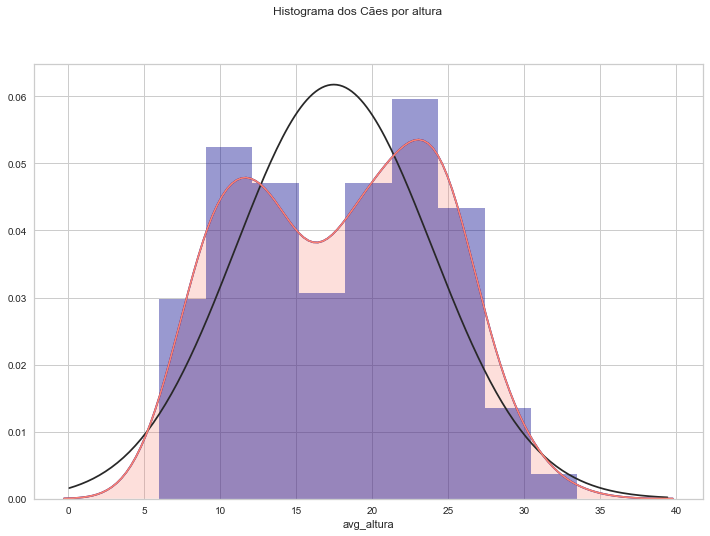

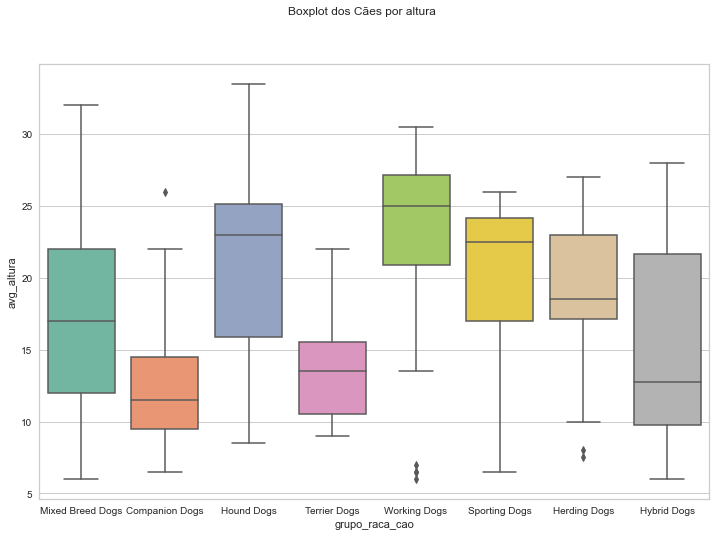

In [13]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Histograma dos Cães por altura')
sns.distplot(dataset_dog_breeds_final['avg_altura'], kde=True, fit=stats.gamma,color="darkblue")
sns.distplot(dataset_dog_breeds_final['avg_altura'], hist=False, color="salmon", kde_kws={"shade": True})

fig = plt.figure(figsize=(12,8))
fig.suptitle('Boxplot dos Cães por altura ')
sns.boxplot(x="grupo_raca_cao", y="avg_altura", data=dataset_dog_breeds_final, linewidth=1.5, palette="Set2")

O gráfico de frequência apresenta uma concentração alta entre 3 a 50 libras, um comportamento assimetrico a esquerda. 
No gráfico de caixa o grupo de cães de trabalho (Working Dogs) possuem um nível de musculatura muito maior em relação aos demais, 125 libras vão equivaler a aproximadamente 56kg.

O grupo misto de raças (Mixed Breeds Dogs) possuem alguns outliers como também o grupo de cães de companhia (Companion Dogs).

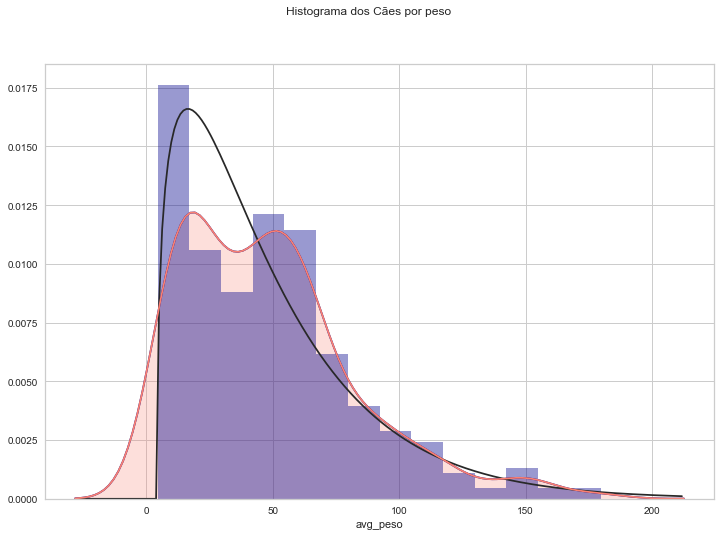

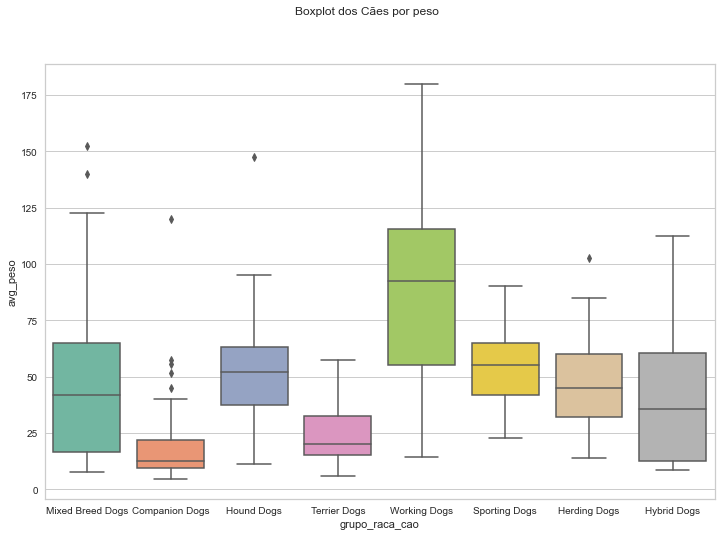

In [14]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Histograma dos Cães por peso')
sns.distplot(dataset_dog_breeds_final['avg_peso'], kde=True, fit=stats.gamma,color="darkblue")
sns.distplot(dataset_dog_breeds_final['avg_peso'], hist=False, color="salmon", kde_kws={"shade": True})

fig = plt.figure(figsize=(12,8))
fig.suptitle('Boxplot dos Cães por peso ')
sns.boxplot(x="grupo_raca_cao", y="avg_peso", data=dataset_dog_breeds_final, linewidth=1.5, palette="Set2")

A histograma da expectativa das idades dos cães ou o tempo de vida variam entre 6 a 18. Cabe destacar os três pontos mais altos. Mas a concentração da idades ficaram entre 12 a 14 anos de vida.

Entre o primeiro quartil e último quartil os grupos de raças de cães se mantém nas faixas de 11 a 14 anos com alguns outliers para os grupos de cães de companhia (Companion Dogs), Cães de caça (Hound Dogs), Cães pastores (Herding Dogs), e cães hibridos (Hybrid Dogs).

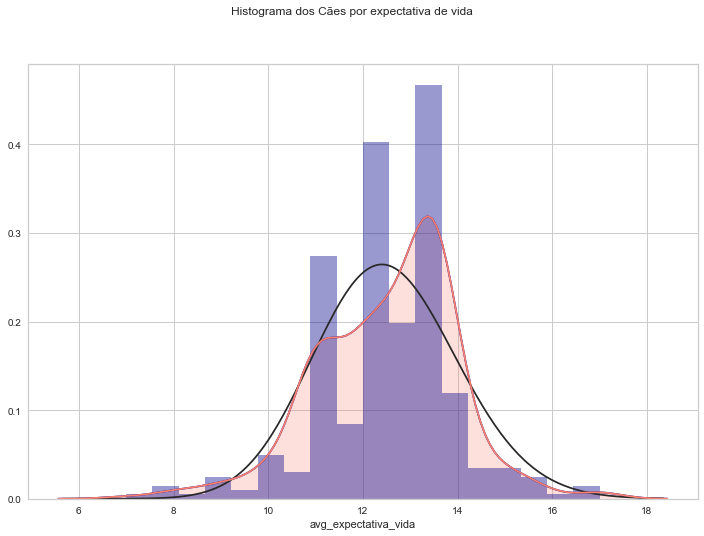

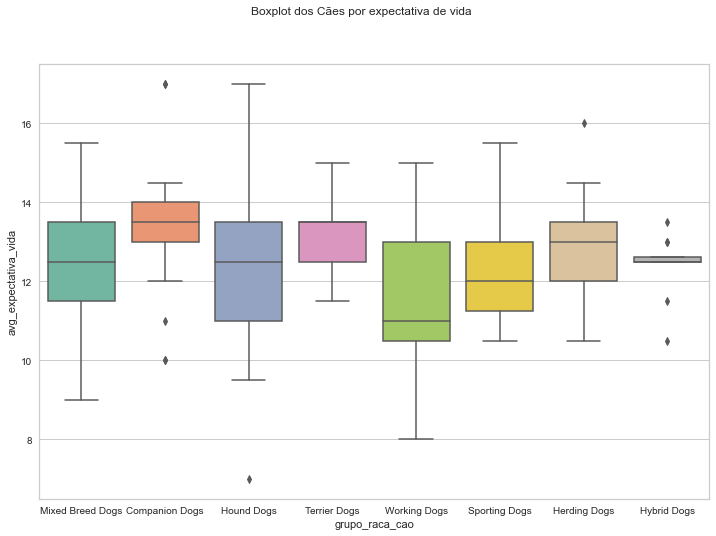

In [15]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Histograma dos Cães por expectativa de vida')
sns.distplot(dataset_dog_breeds_final['avg_expectativa_vida'], kde=True, fit=stats.gamma,color="darkblue")
sns.distplot(dataset_dog_breeds_final['avg_expectativa_vida'], hist=False, color="salmon", kde_kws={"shade": True})

fig = plt.figure(figsize=(12,8))
fig.suptitle('Boxplot dos Cães por expectativa de vida ')
sns.boxplot(x="grupo_raca_cao", y="avg_expectativa_vida", data=dataset_dog_breeds_final, linewidth=1.5, palette="Set2")

Antes de realizarmos nossas predições

In [16]:
#Excluindo a coluna nome das raças
df_dogs = dataset_dog_breeds_final.drop(columns = ["raca","simpatia","potencial_babar","nivel_sensibilidade","cao_amigavel","potencia_diversao"])
df_dogs.head()

,adaptabilidade,necessidade_saude_higiene,treinabilidade,necessidade_fisicas,vida_apartamento,bom_proprietarios_iniciantes,tolera_estar_sozinho,tolera_tempo_frio,tolera_tempo_quente,nivel_carinho_familia,adequado_para_criancas,amigavel_com_estranho,queda_pelo,facilidade_cuidado,saude_geral,ganho_peso,tamanho,facil_treinar,inteligencia,nivel_mordida,preso,tendencia_latir_uivar,desejo_viajar,nivel_energia,intensidade,necessidade_exercicio,grupo_raca_cao,avg_altura,avg_peso,avg_expectativa_vida
0,0,1,1,1,0,0,1,1,0,1,0,0,1,0,1,1,1,0,1,1,1,1,1,1,1,1,Mixed Breed Dogs,24.5,62.5,11.0
1,1,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,1,0,1,0,1,1,1,Mixed Breed Dogs,9.0,8.0,15.5
2,1,0,1,1,1,1,0,1,1,1,0,1,0,1,1,1,0,0,1,1,1,0,0,1,1,1,Companion Dogs,10.0,8.0,13.0
3,1,0,1,1,1,1,0,1,1,1,1,0,1,0,1,0,1,0,1,1,1,0,1,1,0,1,Hound Dogs,25.0,55.0,11.0
4,0,1,1,1,0,0,0,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,Terrier Dogs,22.0,52.5,11.5


<h4> 2. Aplicação do Modelo </h4>

Aqui podemos separar nossa variável definindo as variável que queremos prever, isto é, $y = f(x)$

In [17]:
import janitor as jn
X, y = jn.get_features_targets(df_dogs, target_columns="grupo_raca_cao")

In [18]:
#Realizando a separação da base de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=0)

len(X_train), len(X_test), len(X_train) + len(X_test)

(325, 37, 362)

<h4> 2.1 - Criação de um modelo base</h4>

Importante criar um modelo base  para termos uma noção de como o modelo está se comportando. Assim vamos aplicar um modelo dummy de classificação.

In [19]:
from sklearn.dummy import DummyClassifier
bm = DummyClassifier()
bm.fit(X_train, y_train)
bm.score(X_test, y_test) #precisão

0.16216216216216217

In [20]:
from sklearn import metrics
metrics.precision_score(y_test, bm.predict(X_test), average='micro')

0.10810810810810811

Vamos comparar alguns algoritmos e ver o desempenho deles sendo aplicado em nossa base de dados.

In [21]:
#Modelo de Regressão logítica
from sklearn.linear_model import (LogisticRegression)
lr = LogisticRegression(random_state=10)
lr.fit(X_train, y_train) #Cria o modelo 
y_pred = lr.predict(X_test)
lr_score = lr.score(X_test, y_test)

#Modelo Naive Bayes
from sklearn.naive_bayes import(GaussianNB)
nb = GaussianNB()
nb.fit(X_train, y_train) #Cria o modelo
y_pred2 = nb.predict(X_test)
nb_score = nb.score(X_test, y_test)


#Modelo Support Vector Machine
from sklearn.svm import SVC
svc = SVC(random_state = 10, probability = True)
svc.fit(X_train, y_train)
y_pred3 = svc.predict(X_test)
svc_score = svc.score(X_test, y_test)


#Modelo árvore de decisão
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_train, y_train) #Cria o modelo 
y_pred4 = dt.predict(X_test)
dt_score = dt.score(X_test, y_test)


#Modelo Floresta Aleatória
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(random_state=42)
rdf.fit(X_train, y_train) #Cria o modelo 
y_pred5 = rdf.predict(X_test)
rdf_score = rdf.score(X_test, y_test)


#Modelo  Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train) #Cria o modelo 
y_pred6 = gbc.predict(X_test)
gbc_score = gbc.score(X_test, y_test)


#Modelo XGBoost
import xgboost as xgb
xgb_class = xgb.XGBClassifier(random_state=42, objective='binary')
xgb_class.fit(X_train, y_train) #Cria o modelo 
y_pred7 = xgb_class.predict(X_test)
xgb_class_score = xgb_class.score(X_test, y_test)


#Modelo Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgdc_class = SGDClassifier()
sgdc_class.fit(X_train, y_train) #Cria o modelo 
y_pred8 = sgdc_class.predict(X_test)
sgdc_class_score = sgdc_class.score(X_test, y_test)


#Modelo AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier(n_estimators=5, algorithm="SAMME", random_state=42)
ad.fit(X_train, y_train) #Cria o modelo 
y_pred9 = ad.predict(X_test)
ad_score = ad.score(X_test, y_test)


#Modelo de rede neural MLPClassifier
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(solver='lbfgs', random_state=10, activation='tanh', hidden_layer_sizes=[100,70], max_iter=300)
mlpc.fit(X_train, y_train) #Cria o modelo 
y_pred10 = mlpc.predict(X_test)
mlpc_score = mlpc.score(X_test, y_test)

#Modelo Regrssão Logística com Cross-Validation Estimator.
from sklearn.linear_model import LogisticRegressionCV
lrcv = LogisticRegressionCV(cv=5, random_state=42)
lrcv.fit(X_train, y_train) #Cria o modelo 
y_pred11 = lrcv.predict(X_test)
lrcv_score = lrcv.score(X_test, y_test)



print("Model Logistic Regression:", accuracy_score(y_test, y_pred))
print("Model Naive Bayes:", accuracy_score(y_test, y_pred2))
print("Model Support Vector Machine:", accuracy_score(y_test, y_pred3))
print("Model Decision Tree:", accuracy_score(y_test, y_pred4))
print("Model Random Forest Classifier:", accuracy_score(y_test, y_pred5))
print("Model GradientBoostingClassifier:", accuracy_score(y_test, y_pred6))
print("Model XGBClassifier:", accuracy_score(y_test, y_pred7))
print("Model Stochastic Gradient Descent:", accuracy_score(y_test, y_pred8))
print("Model AdaBoostClassifier:", accuracy_score(y_test, y_pred9))
print("Model MLPClassifier:", accuracy_score(y_test, y_pred10))
print("Model LogisticRegressionCV:", accuracy_score(y_test, y_pred11))

Model Logistic Regression: 0.5945945945945946
Model Naive Bayes: 0.24324324324324326
Model Support Vector Machine: 0.43243243243243246
Model Decision Tree: 0.3783783783783784
Model Random Forest Classifier: 0.5135135135135135
Model GradientBoostingClassifier: 0.4594594594594595
Model XGBClassifier: 0.4594594594594595
Model Stochastic Gradient Descent: 0.32432432432432434
Model AdaBoostClassifier: 0.35135135135135137
Model MLPClassifier: 0.3783783783783784
Model LogisticRegressionCV: 0.43243243243243246


In [22]:
result_model = pd.DataFrame({
                        'Model': ['Logistic Regression','Naive Bayes', 'Support Vector Machine', 'Decision Tree',
                                 'Random Forest Classifier', 'GradientBoostingClassifier','XGBClassifier',
                                 'Stochastic Gradient Descent','AdaBoostClassifier',
                                  'MLPClassifier','LogisticRegressionCV'],
    
                        'Score': [lr_score, nb_score, svc_score, dt_score, rdf_score, gbc_score, xgb_class_score,
                                 sgdc_class_score, ad_score, mlpc_score, lrcv_score]


})

result_model = result_model.sort_values(by='Score', ascending=False).set_index('Model')
result_model

,Score
Model,
Logistic Regression,0.59
Random Forest Classifier,0.51
GradientBoostingClassifier,0.46
XGBClassifier,0.46
Support Vector Machine,0.43
LogisticRegressionCV,0.43
Decision Tree,0.38
MLPClassifier,0.38
AdaBoostClassifier,0.35


Vimos que o modelo de regressão logística teve um desempenho superior aos demais, mas o modelo ainda possui uma taxa de acerto muito baixa. Nossos dados possuem uma amostra muito pequena um número de classes muito grande. Para muitas classes por exemplo temos poucas amostras, sendo assim precisamos realizar uma melhora nos dados para que o algoritmo tenha melhor desempenho. Assim nossa classe sofrerá a seguinte alteração:

 - **Domestic Dog** - cães com características mais doméstica.
 - **Adventurous Dog** - cães com características mais aventureiras

- **Companion Dogs** : Cães excelentes para companhias. será transformado na feature **Domestic dog**.
- **Herding Dogs**: Os cães desta categoria foram desenvolvidos para controlar grandes rebanhos de ovelhas ou rebanhos de gado. será transformado na feature **Adventurous Dog**.
- **Hound Dogs**: Cães de caça, será transformado na feature **Domestic dog**.
- **Hybrid Dogs**:  Raças criadas pelo cruzamento de várias outras raças será transformado na feature **Adventurous Dog**.
- **Mixed Breed Dogs**: Cães de raça Mista, será transformado na feature **Domestic dog**
- **Sporting Dogs**: Cães esportivos será transformado na feature **Adventurous Dog**.
- **Terrier Dogs**: Apesar de terem propensão a serem aventureiros essa classe tem característica domésticas.será transformado na feature **Domestic dog**

- **Working Dogs**: Os diversos cães representados neste grupo foram criados para executar uma variedade de tarefas, desde guardar pessoas, propriedades e gado até puxar carroças ou trenós, será transformado na feature **Adventurous Dog**.


Vamos criar uma nova base de dados e aplicar as novas classificações.

In [23]:
df_dogs2 = df_dogs.copy()
df_dogs2.head()

,adaptabilidade,necessidade_saude_higiene,treinabilidade,necessidade_fisicas,vida_apartamento,bom_proprietarios_iniciantes,tolera_estar_sozinho,tolera_tempo_frio,tolera_tempo_quente,nivel_carinho_familia,adequado_para_criancas,amigavel_com_estranho,queda_pelo,facilidade_cuidado,saude_geral,ganho_peso,tamanho,facil_treinar,inteligencia,nivel_mordida,preso,tendencia_latir_uivar,desejo_viajar,nivel_energia,intensidade,necessidade_exercicio,grupo_raca_cao,avg_altura,avg_peso,avg_expectativa_vida
0,0,1,1,1,0,0,1,1,0,1,0,0,1,0,1,1,1,0,1,1,1,1,1,1,1,1,Mixed Breed Dogs,24.5,62.5,11.0
1,1,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,1,0,1,0,1,1,1,Mixed Breed Dogs,9.0,8.0,15.5
2,1,0,1,1,1,1,0,1,1,1,0,1,0,1,1,1,0,0,1,1,1,0,0,1,1,1,Companion Dogs,10.0,8.0,13.0
3,1,0,1,1,1,1,0,1,1,1,1,0,1,0,1,0,1,0,1,1,1,0,1,1,0,1,Hound Dogs,25.0,55.0,11.0
4,0,1,1,1,0,0,0,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,Terrier Dogs,22.0,52.5,11.5


In [24]:
#q = {"Hybrid Dogs":"Dogs Hybrid Mixed", 
#     "Mixed Breed Dogs":"Dogs Hybrid Mixed",
#    "Working Dogs": "Dogs Working Sporting",
#    "Sporting Dogs":"Dogs Working Sporting",
#    "Hound Dogs": "Dogs Hound Herding",
#    "Herding Dogs": "Dogs Hound Herding",
#    "Terrier Dogs":"Companion Dogs"}


q = {"Hybrid Dogs":"Domestic dog", 
     "Mixed Breed Dogs":"Domestic dog",
    "Working Dogs": "Adventurous Dog",
    "Sporting Dogs":"Adventurous Dog",
    "Hound Dogs": "Adventurous Dog",
    "Herding Dogs": "Adventurous Dog",
    "Terrier Dogs":"Domestic dog",
    "Companion Dogs":"Domestic dog"}


df_dogs3 = dataset_dog_breeds_final.replace({"grupo_raca_cao": q})

df_dogs3.head()

,raca,adaptabilidade,simpatia,necessidade_saude_higiene,treinabilidade,necessidade_fisicas,vida_apartamento,bom_proprietarios_iniciantes,nivel_sensibilidade,tolera_estar_sozinho,tolera_tempo_frio,tolera_tempo_quente,nivel_carinho_familia,adequado_para_criancas,cao_amigavel,amigavel_com_estranho,queda_pelo,potencial_babar,facilidade_cuidado,saude_geral,ganho_peso,tamanho,facil_treinar,inteligencia,nivel_mordida,preso,tendencia_latir_uivar,desejo_viajar,nivel_energia,intensidade,necessidade_exercicio,potencia_diversao,grupo_raca_cao,avg_altura,avg_peso,avg_expectativa_vida
0,Afador,0,1,1,1,1,0,0,1,1,1,0,1,0,1,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,Domestic dog,24.5,62.5,11.0
1,Affenhuahua,1,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,1,1,1,0,1,1,1,0,1,0,1,1,1,1,Domestic dog,9.0,8.0,15.5
2,Affenpinscher,1,1,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0,1,1,1,0,0,1,1,1,0,0,1,1,1,1,Domestic dog,10.0,8.0,13.0
3,Afghan Hound,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,0,0,1,0,1,0,1,1,1,0,1,1,0,1,1,Adventurous Dog,25.0,55.0,11.0
4,Airedale Terrier,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,Domestic dog,22.0,52.5,11.5


In [25]:
table2 =df_dogs3.groupby('grupo_raca_cao')['raca'].count().reset_index().sort_values(['raca'], ascending=False)
table2['Percent%'] = round(100 * table2['raca'] / table2['raca'].sum(),2)
table2

,grupo_raca_cao,raca,Percent%
1,Domestic dog,204,56.35
0,Adventurous Dog,158,43.65


In [26]:
#Excluindo a coluna nome das raças
df_dogs4 = df_dogs3.drop(columns = ["raca"]) #,"simpatia","potencial_babar","cao_amigavel","potencia_diversao"])
df_dogs4.head()

,adaptabilidade,simpatia,necessidade_saude_higiene,treinabilidade,necessidade_fisicas,vida_apartamento,bom_proprietarios_iniciantes,nivel_sensibilidade,tolera_estar_sozinho,tolera_tempo_frio,tolera_tempo_quente,nivel_carinho_familia,adequado_para_criancas,cao_amigavel,amigavel_com_estranho,queda_pelo,potencial_babar,facilidade_cuidado,saude_geral,ganho_peso,tamanho,facil_treinar,inteligencia,nivel_mordida,preso,tendencia_latir_uivar,desejo_viajar,nivel_energia,intensidade,necessidade_exercicio,potencia_diversao,grupo_raca_cao,avg_altura,avg_peso,avg_expectativa_vida
0,0,1,1,1,1,0,0,1,1,1,0,1,0,1,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,Domestic dog,24.5,62.5,11.0
1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,1,1,1,0,1,1,1,0,1,0,1,1,1,1,Domestic dog,9.0,8.0,15.5
2,1,1,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0,1,1,1,0,0,1,1,1,0,0,1,1,1,1,Domestic dog,10.0,8.0,13.0
3,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,0,0,1,0,1,0,1,1,1,0,1,1,0,1,1,Adventurous Dog,25.0,55.0,11.0
4,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,Domestic dog,22.0,52.5,11.5


In [27]:
import janitor as jn
X2, y2 = jn.get_features_targets(df_dogs4, target_columns="grupo_raca_cao")

In [28]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state=0)

len(X_train2), len(X_test2), len(X_train2) + len(X_test2)

(289, 73, 362)

In [37]:
#Modelo de Regressão logítica
from sklearn.linear_model import (LogisticRegression)
lr2 = LogisticRegression(random_state=10)
lr2.fit(X_train2, y_train2) #Cria o modelo 
y_predict = lr2.predict(X_test2)
lr_score2 = lr2.score(X_test2, y_test2)


#Modelo Naive Bayes
from sklearn.naive_bayes import(GaussianNB)
nb2 = GaussianNB()
nb2.fit(X_train2, y_train2) #Cria o modelo
y_predict2 = nb2.predict(X_test2)
nb_score2 = nb2.score(X_test2, y_test2)


#Modelo Support Vector Machine
from sklearn.svm import SVC
svc2 = SVC(random_state = 10, probability = True)
svc2.fit(X_train2, y_train2)
y_predict3 = svc2.predict(X_test2)
svc_score2 = svc2.score(X_test2, y_test2)


#Modelo árvore de decisão
from sklearn.tree import DecisionTreeClassifier
dt2 = DecisionTreeClassifier(random_state=10)
dt2.fit(X_train2, y_train2) #Cria o modelo 
y_predict4 = dt2.predict(X_test2)
dt_score2 = dt2.score(X_test2, y_test2)


#Modelo Floresta Aleatória
from sklearn.ensemble import RandomForestClassifier
rdf2 = RandomForestClassifier(random_state=42)
rdf2.fit(X_train2, y_train2) #Cria o modelo 
y_predict5 = rdf2.predict(X_test2)
rdf_score2 = rdf2.score(X_test2, y_test2)


#Modelo  Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc2 = GradientBoostingClassifier(random_state=42)
gbc2.fit(X_train2, y_train2) #Cria o modelo 
y_predict6 = gbc2.predict(X_test2)
gbc_score2 = gbc2.score(X_test2, y_test2)


#Modelo XGBoost
import xgboost as xgb
xgb_class2 = xgb.XGBClassifier(random_state=42)
xgb_class2.fit(X_train2, y_train2) #Cria o modelo 
y_predict7 = xgb_class2.predict(X_test2)
xgb_class_score2 = xgb_class2.score(X_test2, y_test2)


#Modelo Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgdc_class2 = SGDClassifier()
sgdc_class2.fit(X_train2, y_train2) #Cria o modelo 
y_predict8 = sgdc_class2.predict(X_test2)
sgdc_class_score2 = sgdc_class2.score(X_test2, y_test2)


#Modelo AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ad2 = AdaBoostClassifier(n_estimators=5, algorithm="SAMME", random_state=42)
ad2.fit(X_train2, y_train2) #Cria o modelo 
y_predict9 = ad2.predict(X_test2)
ad_score2 = ad2.score(X_test2, y_test2)


#Modelo de rede neural MLPClassifier
from sklearn.neural_network import MLPClassifier
mlpc2 = MLPClassifier(solver='lbfgs', random_state=10, activation='tanh', hidden_layer_sizes=[100,70], max_iter=300)
mlpc2.fit(X_train2, y_train2) #Cria o modelo 
y_predict10 = mlpc2.predict(X_test2)
mlpc_score2 = mlpc2.score(X_test2, y_test2)

#Modelo Regrssão Logística com Cross-Validation Estimator.
from sklearn.linear_model import LogisticRegressionCV
lrcv2 = LogisticRegressionCV(cv=5, random_state=42)
lrcv2.fit(X_train2, y_train2) #Cria o modelo 
y_predict11 = lrcv2.predict(X_test2)
lrcv_score2 = lrcv2.score(X_test2, y_test2)


print("Model Logistic Regression:", accuracy_score(y_test2, y_predict))
print("Model Naive Bayes:", accuracy_score(y_test2, y_predict2))
print("Model Support Vector Machine:", accuracy_score(y_test2, y_predict3))
print("Model Decision Tree:", accuracy_score(y_test2, y_predict4))
print("Model Random Forest Classifier:", accuracy_score(y_test2, y_predict5))
print("Model GradientBoostingClassifier:", accuracy_score(y_test2, y_predict6))
print("Model XGBClassifier:", accuracy_score(y_test2, y_predict7))
print("Model Stochastic Gradient Descent:", accuracy_score(y_test2, y_predict8))
print("Model AdaBoostClassifier:", accuracy_score(y_test2, y_predict9))
print("Model MLPClassifier:", accuracy_score(y_test2, y_predict10))
print("Model LogisticRegressionCV:", accuracy_score(y_test2, y_predict11))

Model Logistic Regression: 0.7945205479452054
Model Naive Bayes: 0.6027397260273972
Model Support Vector Machine: 0.6712328767123288
Model Decision Tree: 0.7397260273972602
Model Random Forest Classifier: 0.7534246575342466
Model GradientBoostingClassifier: 0.6986301369863014
Model XGBClassifier: 0.7808219178082192
Model Stochastic Gradient Descent: 0.7123287671232876
Model AdaBoostClassifier: 0.726027397260274
Model MLPClassifier: 0.7123287671232876
Model LogisticRegressionCV: 0.7671232876712328


Após os ajustes aplicados geramos a nova classificação dos algoritmos.

In [38]:
result_model2 = pd.DataFrame({
                        'Model': ['Logistic Regression','Naive Bayes', 'Support Vector Machine', 'Decision Tree',
                                 'Random Forest Classifier', 'GradientBoostingClassifier','XGBClassifier',
                                 'Stochastic Gradient Descent','AdaBoostClassifier',
                                  'MLPClassifier','LogisticRegressionCV'],
    
                        'Score': [lr_score2, nb_score2, svc_score2, dt_score2, rdf_score2, gbc_score2, xgb_class_score2,
                                 sgdc_class_score2, ad_score2, mlpc_score2, lrcv_score2]


})

result_model2 = result_model2.sort_values(by='Score', ascending=False).set_index('Model')
result_model2

,Score
Model,
Logistic Regression,0.79
XGBClassifier,0.78
LogisticRegressionCV,0.77
Random Forest Classifier,0.75
Decision Tree,0.74
AdaBoostClassifier,0.73
Stochastic Gradient Descent,0.71
MLPClassifier,0.71
GradientBoostingClassifier,0.70


Os modelos que tiveram melhor performance foram o Regressão Logística e XGBClassifier. Vamos adotar esses dois modelos para o nosso conjunto de dados.

-O modelo de **regressão logística** estima as probabilidades usando uma função logística. Esse modelo tem a capacidade de trabalhar com varívaveis categóricas utilizando dados binários e contínuos.

-O modelo **XGBoostClassifier** cria uma árvore que possui uma certa fraqueza, no entanto ele faz uma melhora nas árvores posteriores diminuindo a capacidade dos erros dos resíduos. Esse algoritmo tenta capturar e realizar o tratamento em qualquer padrão identificado nos erros.


Para o modelo de regressão logística nossa matriz de confusão a parte superior a esquerda preveu 27 valores classificados como Domestic Dog e 31 como Adventurous Dog, isto é, as classificações corretas. Já a parte inferior á esquerda são os falsos-negativos que 8 valores eram Adventurous Dog e foram previstos 8 Domestic Dog. A parte superior à direita são os falsos-positivos, que mostram 7 Domestic Dog foram previstas como Adventurous Dog.

A taxa de erro do modelo foi de 0.20.

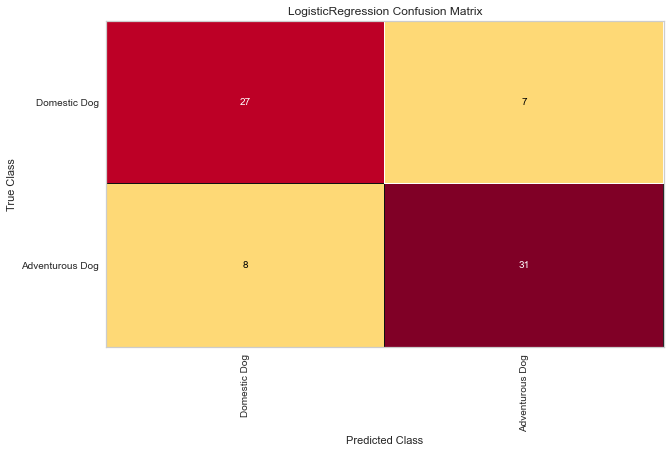

Missclasification - Error Rate: 0.20547945205479456


In [30]:
from yellowbrick.classifier import (ConfusionMatrix)
#mapping = {0:"Mina", 1:"Rocha"}
fig, ax = plt.subplots(figsize=(10,6))
cm_viz = ConfusionMatrix(lr2,
                        classes=["Domestic Dog", "Adventurous Dog"],
                        )
cm_viz.score(X_test2, y_test2)
cm_viz.poof()

print("Missclasification - Error Rate:", 1 - accuracy_score(y_test2, y_predict))

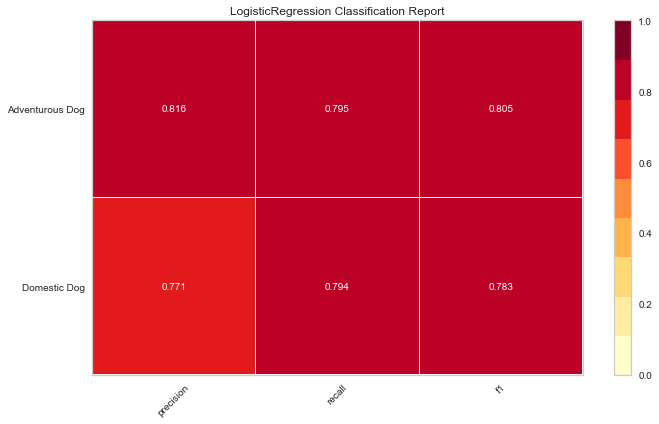

In [57]:
from yellowbrick.classifier import (ClassificationReport)
#mapping = {0:"Domestic Dog", 1:"Adventurous Dog"}
fig, ax = plt.subplots(figsize=(10,6))
cm_viz = ClassificationReport(lr2,
                             classes=["Domestic Dog", "Adventurous Dog"],
                             )
cm_viz.score(X_test2, y_test2)
cm_viz.poof()

A biblioteca lime calcula as probabilidades da importância de uma feature para o modelo. Se o usuário pensa em adotar um cão cujo o perfil seja doméstico o modelo recomenda olhar o peso, tamanho entre outras variáveis. Já para o usuário que prefere um cão com perfil aventureiro deve olhar, queda de pelo, facilidade em cuidado e o potencial de saliva do cão.

In [43]:
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(X_train2.values,
                                             feature_names = X2.columns,
                                             class_names = ["Domestic Dog", "Adventurous Dog"])

exp = explainer.explain_instance(X_train2.iloc[-1].values, lr2.predict_proba)
exp.show_in_notebook()

Para o modelo de regressão logística nossa matriz de confusão a parte superior a esquerda preveu 27 valores classificados como Domestic Dog e 30 como Adventurous Dog, isto é, as classificações corretas. Já a parte inferior á esquerda são os falsos-negativos que 9 valores eram Adventurous Dog e foram previstos 9 Domestic Dog. A parte superior à direita são os falsos-positivos, que mostram 7 Domestic Dog foram previstas como Adventurous Dog.

A taxa de erro do modelo foi de 0.21.

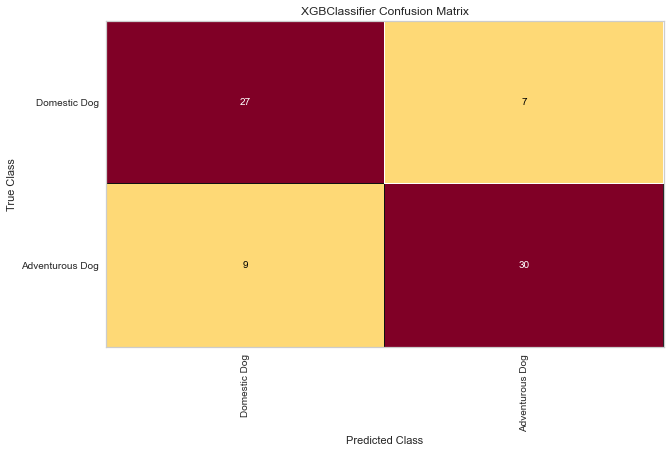

Missclasification - Error Rate: 0.2191780821917808


In [41]:
from yellowbrick.classifier import (ConfusionMatrix)
#mapping = {0:"Mina", 1:"Rocha"}
fig, ax = plt.subplots(figsize=(10,6))
cm_viz = ConfusionMatrix(xgb_class2,
                        classes=["Domestic Dog", "Adventurous Dog"],
                        )
cm_viz.score(X_test2, y_test2)
cm_viz.poof()

print("Missclasification - Error Rate:", 1 - accuracy_score(y_test2, y_predict7))

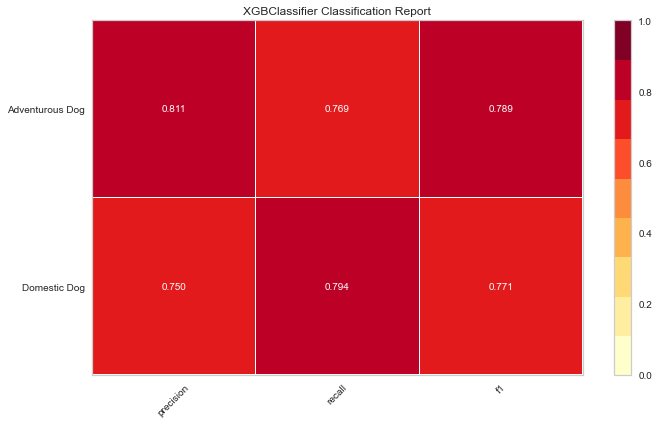

In [58]:
from yellowbrick.classifier import (ClassificationReport)
#mapping = {0:"Domestic Dog", 1:"Adventurous Dog"}
fig, ax = plt.subplots(figsize=(10,6))
cm_viz = ClassificationReport(xgb_class2,
                             classes=["Domestic Dog", "Adventurous Dog"],
                             label_encoder=mapping)
cm_viz.score(X_test2, y_test2)
cm_viz.poof()

Já o modelo de árvore XGBoost cosiderou diversas variáveis importantes no quesito classificação dos cães. Features bastante relevantes para se observar ao escolha de um cachorro. O primeira explanação do modelo separa por classes o segundo podemos ver a importância que o modelo mais considerou.

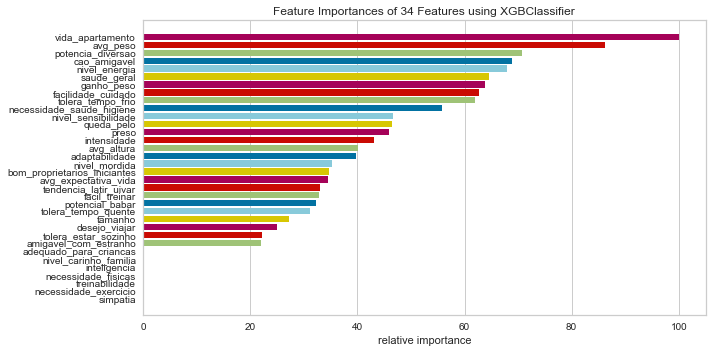

In [49]:
from yellowbrick.features import(FeatureImportances)

fig, ax = plt.subplots(figsize=(10,5))
fi_viz = FeatureImportances(xgb_class2, labels = X2.columns)

fi_viz.fit(X2, y2)
fi_viz.poof()